# 투구정보 EDA - 스트라이크존, 로케이션 구현 및 ML 학습

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_main = pd.read_csv("/content/drive/MyDrive/핵심프로젝트/S존 학습용 데이터.csv")
df_main.dropna(inplace=True)

In [4]:
df_main

,game_date,refree,home_name,away_name,inning,x_spot,y_spot,ball_speed(km/h),judgement,ball_type,...,refree_szone_hitter_width,refree_szone_hitter_height,refree_szone_inning_nx,refree_szone_inning_ny,refree_szone_inning_width,refree_szone_inning_height,refree_szone_btype_nx,refree_szone_btype_ny,refree_szone_btype_width,refree_szone_btype_height
0,2019-03-24,김준희,두산,한화,1,130.411007,198.196223,144.0,스트라이크,투심,...,125.607030,178.359406,112.870339,153.980292,157.995200,203.792914,101.928604,168.947515,157.321757,204.552046
1,2019-03-24,김준희,두산,한화,1,130.411007,198.196223,144.0,스트라이크,투심,...,125.607030,178.359406,112.870339,153.980292,157.995200,203.792914,101.928604,168.947515,157.321757,204.552046
2,2019-03-24,김준희,두산,한화,1,130.411007,198.196223,144.0,스트라이크,투심,...,125.607030,178.359406,112.870339,153.980292,157.995200,203.792914,101.928604,168.947515,157.321757,204.552046
3,2019-03-24,김준희,두산,한화,1,52.250746,206.945343,145.0,스트라이크,투심,...,125.607030,178.359406,112.870339,153.980292,157.995200,203.792914,101.928604,168.947515,157.321757,204.552046
4,2019-03-24,김준희,두산,한화,1,52.250746,206.945343,145.0,스트라이크,투심,...,125.607030,178.359406,112.870339,153.980292,157.995200,203.792914,101.928604,168.947515,157.321757,204.552046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494638,2023-08-08,김병주,키움,롯데,1,136.999266,77.929480,146.0,스트라이크,직구,...,7.619976,99.225600,110.938571,151.592155,171.469429,198.480731,104.519177,152.839423,185.040343,207.214217
494639,2023-08-08,김병주,키움,롯데,6,144.619241,177.155080,144.0,스트라이크,직구,...,7.619976,99.225600,106.141013,156.053572,176.674343,200.496686,104.519177,152.839423,185.040343,207.214217
494640,2023-08-09,유덕형,키움,롯데,1,115.124190,168.832429,147.0,스트라이크,직구,...,88.242299,28.675017,101.864617,157.576612,153.969314,190.984960,103.536407,155.531126,154.538014,208.991314
494641,2023-08-09,유덕형,키움,롯데,1,135.744500,181.858395,144.0,스트라이크,직구,...,88.242299,28.675017,101.864617,157.576612,153.969314,190.984960,103.536407,155.531126,154.538014,208.991314


In [5]:
df_main = pd.read_csv("/content/drive/MyDrive/핵심프로젝트/S존 학습용 데이터.csv")
df_main.dropna(inplace=True)

In [5]:
df_main.columns

Index(['game_date', 'refree', 'home_name', 'away_name', 'inning', 'x_spot',
       'y_spot', 'ball_speed(km/h)', 'judgement', 'ball_type', 'pitcher_name',
       'pitcher_potision', 'hitter_name', 'hitter_position', 'game_place',
       'game_start_time', 'hitter_team', 'hitter_height(cm)',
       'hitter_weight(kg)', 'hitter_szone_nx', 'hitter_szone_ny',
       'hitter_szone_width', 'hitter_szone_height', 'refree_szone_default_nx',
       'refree_szone_default_ny', 'refree_szone_default_width',
       'refree_szone_default_height', 'refree_szone_hitter_nx',
       'refree_szone_hitter_ny', 'refree_szone_hitter_width',
       'refree_szone_hitter_height', 'refree_szone_inning_nx',
       'refree_szone_inning_ny', 'refree_szone_inning_width',
       'refree_szone_inning_height', 'refree_szone_btype_nx',
       'refree_szone_btype_ny', 'refree_szone_btype_width',
       'refree_szone_btype_height'],
      dtype='object')

## 타자별 스트라이크존 구성
- 학습 대상 피쳐: "hitter_height(cm)", "hitter_weight(kg)", "hitter_name"
#### m_hitter_szone_nx 학습용 데이터
    - 라벨데이터(y): hitter_szone_nx / x_spot 중앙값
#### m_hitter_szone_ny 학습용 데이터
    - 라벨데이터(y): hitter_szone_ny / y_spot 중앙값
#### m_hitter_szone_width 학습용 데이터
    - 라벨데이터(y): hitter_szone_height / x_spot.max() - x_spot.min()
#### m_hitter_szone_height 학습옹 데이터
    - 라벨데이터(y): hitter_szone_height / y_spot.max() - y_spot.min()

### 전처리

#### 학습용 데이터 전처리

In [9]:
X = df_main[["hitter_height(cm)", "hitter_weight(kg)", "hitter_name"]]

hitter_szone_nx = df_main["hitter_szone_nx"]
hitter_szone_ny = df_main["hitter_szone_ny"]
hitter_szone_width = df_main["hitter_szone_width"]
hitter_szone_height = df_main["hitter_szone_height"]

In [10]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

X_cate = X[[i for i in X.columns if X[i].dtype == "object"]]
X_conti = X[[i for i in X.columns if X[i].dtype != "object"]]

ohe_szone = OneHotEncoder()
ms_szone = MinMaxScaler()

data = ohe_szone.fit_transform(X_cate).toarray()
col = ohe_szone.get_feature_names_out()
s_X_cate = pd.DataFrame(data, columns=col)

data = ms_szone.fit_transform(X_conti)
col = ms_szone.get_feature_names_out()
s_X_conti = pd.DataFrame(data, columns=col)

s_X = pd.concat([s_X_cate, s_X_conti], axis=1)

In [8]:
from sklearn.model_selection import train_test_split

tr_hitter_szone_nx_X, tt_hitter_szone_nx_X, tr_hitter_szone_nx, tt_hitter_szone_nx = train_test_split(s_X, hitter_szone_nx)
tr_hitter_szone_ny_X, tt_hitter_szone_ny_X, tr_hitter_szone_ny, tt_hitter_szone_ny = train_test_split(s_X, hitter_szone_ny)
tr_hitter_szone_width_X, tt_hitter_szone_width_X, tr_hitter_szone_width, tt_hitter_szone_width = train_test_split(s_X, hitter_szone_width)
tr_hitter_szone_height_X, tt_hitter_szone_height_X, tr_hitter_szone_height, tt_hitter_szone_height = train_test_split(s_X, hitter_szone_height)

#### 입력용 데이터 전처리기

In [12]:
def hitter_szone_preprocessing(X):
    X = X[["hitter_height(cm)", "hitter_weight(kg)", "hitter_name"]]

    X_cate = X[[i for i in X.columns if X[i].dtype == "object"]]
    X_conti = X[[i for i in X.columns if X[i].dtype != "object"]]

    data = ohe_szone.transform(X_cate).toarray()
    col = ohe_szone.get_feature_names_out()
    X_cate = pd.DataFrame(data, columns=col)

    data = ms_szone.fit_transform(X_conti)
    col = ms_szone.get_feature_names_out()
    X_conti = pd.DataFrame(data, columns=col)

    s_X = pd.concat([X_cate, X_conti], axis=1)

    return s_X

### 학습 및 예측

In [9]:
from sklearn.linear_model import Ridge

m_hitter_szone_nx = Ridge()
m_hitter_szone_ny = Ridge()
m_hitter_szone_width = Ridge()
m_hitter_szone_height = Ridge()

m_hitter_szone_nx.fit(tr_hitter_szone_nx_X, tr_hitter_szone_nx)
m_hitter_szone_ny.fit(tr_hitter_szone_ny_X, tr_hitter_szone_ny)
m_hitter_szone_width.fit(tr_hitter_szone_width_X, tr_hitter_szone_width)
m_hitter_szone_height.fit(tr_hitter_szone_height_X, tr_hitter_szone_height)

print(m_hitter_szone_nx.score(tr_hitter_szone_nx_X, tr_hitter_szone_nx), m_hitter_szone_nx.score(tt_hitter_szone_nx_X, tt_hitter_szone_nx))
print(m_hitter_szone_ny.score(tr_hitter_szone_ny_X, tr_hitter_szone_ny), m_hitter_szone_ny.score(tt_hitter_szone_ny_X, tt_hitter_szone_ny))
print(m_hitter_szone_width.score(tr_hitter_szone_width_X, tr_hitter_szone_width), m_hitter_szone_width.score(tt_hitter_szone_width_X, tt_hitter_szone_width))
print(m_hitter_szone_height.score(tr_hitter_szone_height_X, tr_hitter_szone_height), m_hitter_szone_height.score(tt_hitter_szone_height_X, tt_hitter_szone_height))

NameError: name 'tr_hitter_szone_nx_X' is not defined

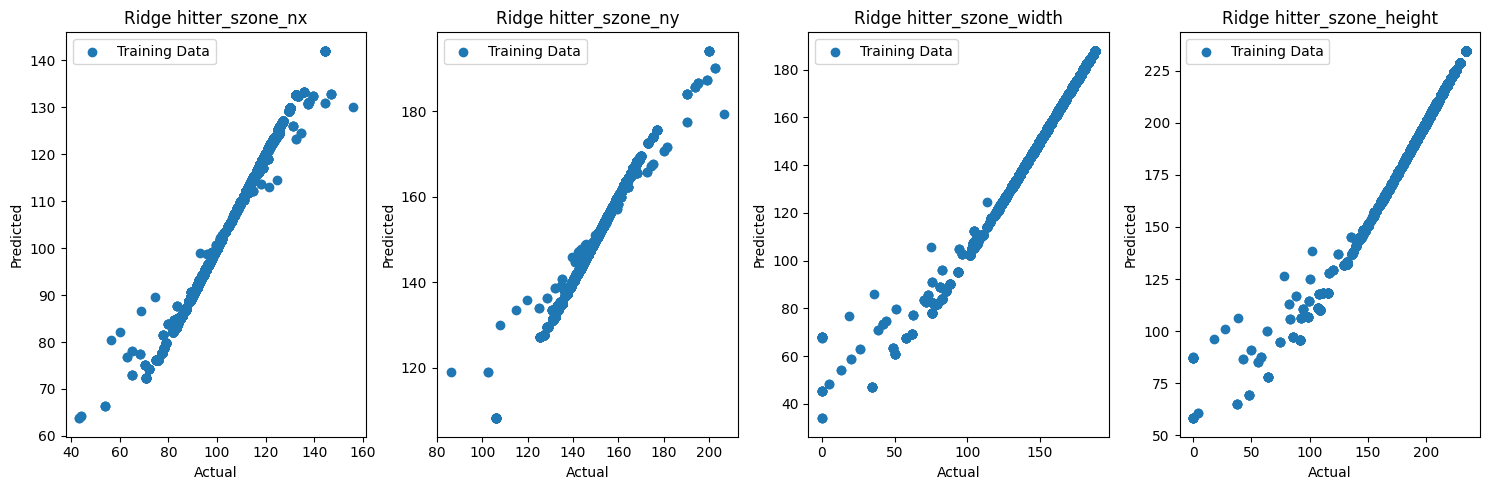

In [12]:
import matplotlib.pyplot as plt

# Ridge 모델 훈련
from sklearn.linear_model import Ridge

m_hitter_szone_nx = Ridge()
m_hitter_szone_ny = Ridge()
m_hitter_szone_width = Ridge()
m_hitter_szone_height = Ridge()

m_hitter_szone_nx.fit(tr_hitter_szone_nx_X, tr_hitter_szone_nx)
m_hitter_szone_ny.fit(tr_hitter_szone_ny_X, tr_hitter_szone_ny)
m_hitter_szone_width.fit(tr_hitter_szone_width_X, tr_hitter_szone_width)
m_hitter_szone_height.fit(tr_hitter_szone_height_X, tr_hitter_szone_height)

# 훈련 데이터의 산점도
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.scatter(tr_hitter_szone_nx, m_hitter_szone_nx.predict(tr_hitter_szone_nx_X), label='Training Data')
plt.title('Ridge hitter_szone_nx')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

plt.subplot(1, 4, 2)
plt.scatter(tr_hitter_szone_ny, m_hitter_szone_ny.predict(tr_hitter_szone_ny_X), label='Training Data')
plt.title('Ridge hitter_szone_ny')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

plt.subplot(1, 4, 3)
plt.scatter(tr_hitter_szone_width, m_hitter_szone_width.predict(tr_hitter_szone_width_X), label='Training Data')
plt.title('Ridge hitter_szone_width')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

plt.subplot(1, 4, 4)
plt.scatter(tr_hitter_szone_height, m_hitter_szone_height.predict(tr_hitter_szone_height_X), label='Training Data')
plt.title('Ridge hitter_szone_height')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

plt.tight_layout()
plt.show()



In [13]:
from sklearn.linear_model import Lasso

m_hitter_szone_nx = Lasso()
m_hitter_szone_ny = Lasso()
m_hitter_szone_width = Lasso()
m_hitter_szone_height = Lasso()

m_hitter_szone_nx.fit(tr_hitter_szone_nx_X, tr_hitter_szone_nx)
m_hitter_szone_ny.fit(tr_hitter_szone_ny_X, tr_hitter_szone_ny)
m_hitter_szone_width.fit(tr_hitter_szone_width_X, tr_hitter_szone_width)
m_hitter_szone_height.fit(tr_hitter_szone_height_X, tr_hitter_szone_height)

print(m_hitter_szone_nx.score(tr_hitter_szone_nx_X, tr_hitter_szone_nx), m_hitter_szone_nx.score(tt_hitter_szone_nx_X, tt_hitter_szone_nx))
print(m_hitter_szone_ny.score(tr_hitter_szone_ny_X, tr_hitter_szone_ny), m_hitter_szone_ny.score(tt_hitter_szone_ny_X, tt_hitter_szone_ny))
print(m_hitter_szone_width.score(tr_hitter_szone_width_X, tr_hitter_szone_width), m_hitter_szone_width.score(tt_hitter_szone_width_X, tt_hitter_szone_width))
print(m_hitter_szone_height.score(tr_hitter_szone_height_X, tr_hitter_szone_height), m_hitter_szone_height.score(tt_hitter_szone_height_X, tt_hitter_szone_height))

0.0 -3.538222778320943e-06
0.0 -1.8909947829826024e-08
0.0 -1.0557560977897396e-05
0.0 -2.147289669718333e-05


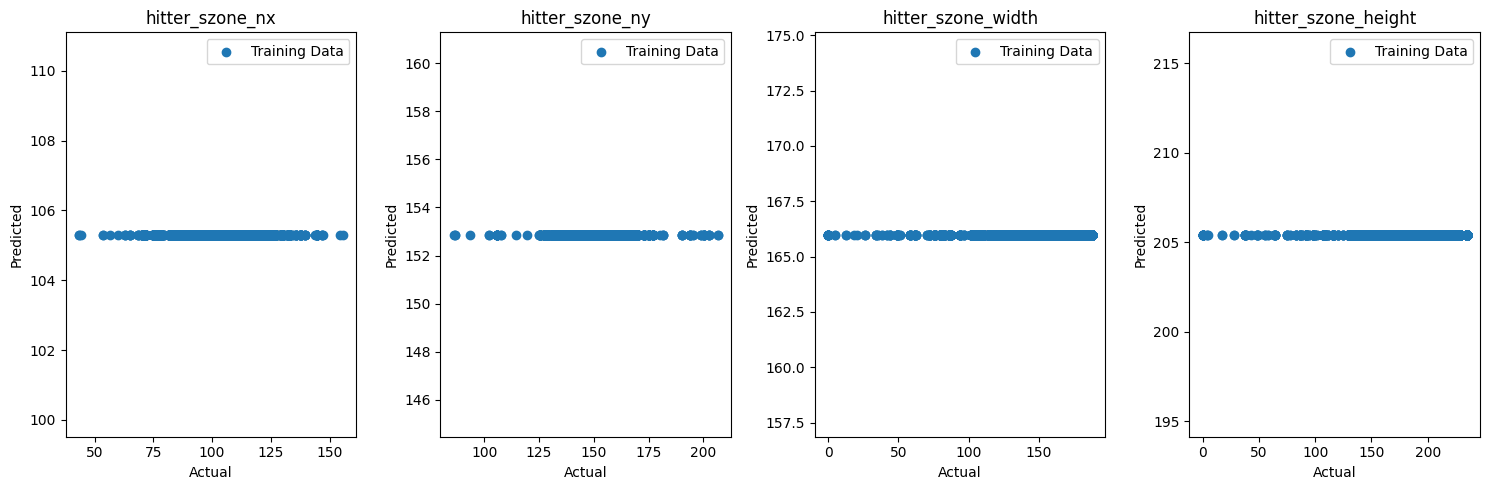

In [ ]:
import matplotlib.pyplot as plt

# Ridge 모델 훈련
from sklearn.linear_model import Lasso

m_hitter_szone_nx = Lasso()
m_hitter_szone_ny = Lasso()
m_hitter_szone_width = Lasso()
m_hitter_szone_height = Lasso()

m_hitter_szone_nx.fit(tr_hitter_szone_nx_X, tr_hitter_szone_nx)
m_hitter_szone_ny.fit(tr_hitter_szone_ny_X, tr_hitter_szone_ny)
m_hitter_szone_width.fit(tr_hitter_szone_width_X, tr_hitter_szone_width)
m_hitter_szone_height.fit(tr_hitter_szone_height_X, tr_hitter_szone_height)

# 훈련 데이터의 산점도
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.scatter(tr_hitter_szone_nx, m_hitter_szone_nx.predict(tr_hitter_szone_nx_X), label='Training Data')
plt.title('hitter_szone_nx')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

plt.subplot(1, 4, 2)
plt.scatter(tr_hitter_szone_ny, m_hitter_szone_ny.predict(tr_hitter_szone_ny_X), label='Training Data')
plt.title('hitter_szone_ny')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

plt.subplot(1, 4, 3)
plt.scatter(tr_hitter_szone_width, m_hitter_szone_width.predict(tr_hitter_szone_width_X), label='Training Data')
plt.title('hitter_szone_width')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

plt.subplot(1, 4, 4)
plt.scatter(tr_hitter_szone_height, m_hitter_szone_height.predict(tr_hitter_szone_height_X), label='Training Data')
plt.title('hitter_szone_height')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

plt.tight_layout()
plt.show()



In [10]:
from sklearn.linear_model import LinearRegression

m_hitter_szone_nx =  LinearRegression()
m_hitter_szone_ny =  LinearRegression()
m_hitter_szone_width =  LinearRegression()
m_hitter_szone_height =  LinearRegression()

m_hitter_szone_nx.fit(tr_hitter_szone_nx_X, tr_hitter_szone_nx)
m_hitter_szone_ny.fit(tr_hitter_szone_ny_X, tr_hitter_szone_ny)
m_hitter_szone_width.fit(tr_hitter_szone_width_X, tr_hitter_szone_width)
m_hitter_szone_height.fit(tr_hitter_szone_height_X, tr_hitter_szone_height)

print(m_hitter_szone_nx.score(tr_hitter_szone_nx_X, tr_hitter_szone_nx), m_hitter_szone_nx.score(tt_hitter_szone_nx_X, tt_hitter_szone_nx))
print(m_hitter_szone_ny.score(tr_hitter_szone_ny_X, tr_hitter_szone_ny), m_hitter_szone_ny.score(tt_hitter_szone_ny_X, tt_hitter_szone_ny))
print(m_hitter_szone_width.score(tr_hitter_szone_width_X, tr_hitter_szone_width), m_hitter_szone_width.score(tt_hitter_szone_width_X, tt_hitter_szone_width))
print(m_hitter_szone_height.score(tr_hitter_szone_height_X, tr_hitter_szone_height), m_hitter_szone_height.score(tt_hitter_szone_height_X, tt_hitter_szone_height))

1.0 0.9998637929186723
1.0 0.9996414266329727
1.0 0.994711119476463
1.0 0.9930624766332213


<ipython-input-17-308a1a492c6b>:34: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  plt.tight_layout()
<ipython-input-17-308a1a492c6b>:34: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  plt.tight_layout()
<ipython-input-17-308a1a492c6b>:34: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  plt.tight_layout()
<ipython-input-17-308a1a492c6b>:34: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
<ipython-input-17-308a1a492c6b>:34: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  plt.tight_layout()
<ipython-input-17-308a1a492c6b>:34: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  plt.tight_layout()
<ipython-input-17-308a1a492c6b>:34: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from current font.
  plt.tight_layout()
<ipython-input-17-308a1a492c6b>:34: UserWarning: Glyph 4944

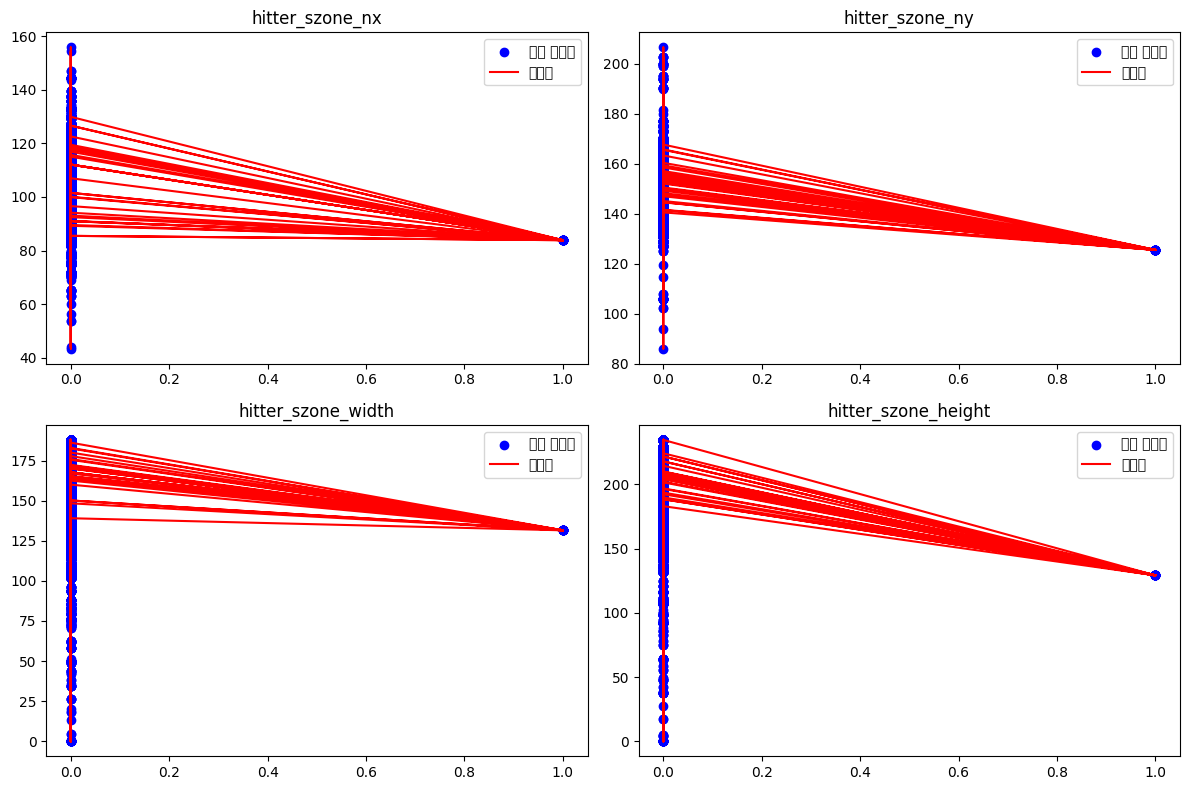

In [ ]:
import matplotlib.pyplot as plt

# 훈련 데이터에 대한 시각화
plt.figure(figsize=(12, 8))

# hitter_szone_nx에 대한 시각화
plt.subplot(2, 2, 1)
plt.scatter(tr_hitter_szone_nx_X.iloc[:, 0], tr_hitter_szone_nx, color='blue', label='실제 데이터')
plt.plot(tr_hitter_szone_nx_X.iloc[:, 0], m_hitter_szone_nx.predict(tr_hitter_szone_nx_X), color='red', label='회귀선')
plt.title('hitter_szone_nx')
plt.legend()

# hitter_szone_ny에 대한 시각화
plt.subplot(2, 2, 2)
plt.scatter(tr_hitter_szone_ny_X.iloc[:, 0], tr_hitter_szone_ny, color='blue', label='실제 데이터')
plt.plot(tr_hitter_szone_ny_X.iloc[:, 0], m_hitter_szone_ny.predict(tr_hitter_szone_ny_X), color='red', label='회귀선')
plt.title('hitter_szone_ny')
plt.legend()

# hitter_szone_width에 대한 시각화
plt.subplot(2, 2, 3)
plt.scatter(tr_hitter_szone_width_X.iloc[:, 0], tr_hitter_szone_width, color='blue', label='실제 데이터')
plt.plot(tr_hitter_szone_width_X.iloc[:, 0], m_hitter_szone_width.predict(tr_hitter_szone_width_X), color='red', label='회귀선')
plt.title('hitter_szone_width')
plt.legend()

# hitter_szone_height에 대한 시각화
plt.subplot(2, 2, 4)
plt.scatter(tr_hitter_szone_height_X.iloc[:, 0], tr_hitter_szone_height, color='blue', label='실제 데이터')
plt.plot(tr_hitter_szone_height_X.iloc[:, 0], m_hitter_szone_height.predict(tr_hitter_szone_height_X), color='red', label='회귀선')
plt.title('hitter_szone_height')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor

m_hitter_szone_nx = DecisionTreeRegressor()
m_hitter_szone_ny = DecisionTreeRegressor()
m_hitter_szone_width = DecisionTreeRegressor()
m_hitter_szone_height = DecisionTreeRegressor()

m_hitter_szone_nx.fit(tr_hitter_szone_nx_X, tr_hitter_szone_nx)
m_hitter_szone_ny.fit(tr_hitter_szone_ny_X, tr_hitter_szone_ny)
m_hitter_szone_width.fit(tr_hitter_szone_width_X, tr_hitter_szone_width)
m_hitter_szone_height.fit(tr_hitter_szone_height_X, tr_hitter_szone_height)

print(m_hitter_szone_nx.score(tr_hitter_szone_nx_X, tr_hitter_szone_nx), m_hitter_szone_nx.score(tt_hitter_szone_nx_X, tt_hitter_szone_nx))
print(m_hitter_szone_ny.score(tr_hitter_szone_ny_X, tr_hitter_szone_ny), m_hitter_szone_ny.score(tt_hitter_szone_ny_X, tt_hitter_szone_ny))
print(m_hitter_szone_width.score(tr_hitter_szone_width_X, tr_hitter_szone_width), m_hitter_szone_width.score(tt_hitter_szone_width_X, tt_hitter_szone_width))
print(m_hitter_szone_height.score(tr_hitter_szone_height_X, tr_hitter_szone_height), m_hitter_szone_height.score(tt_hitter_szone_height_X, tt_hitter_szone_height))

1.0 0.9999948984948089
1.0 0.9991303056534082
1.0 0.9919501874673712
1.0 0.9951907442231469


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# nx 모델에 대한 예제
mse_nx = mean_squared_error(tt_hitter_szone_nx, pred_hitter_szone_nx)
mae_nx = mean_absolute_error(tt_hitter_szone_nx, pred_hitter_szone_nx)
r2_nx = r2_score(tt_hitter_szone_nx, pred_hitter_szone_nx)

print("decisionTree Regression 모델 - MSE:", mse_nx, "MAE:", mae_nx, "R2:", r2_nx)


decisionTree Regression 모델 - MSE: 0.0008787466196513152 MAE: 8.429765301412251e-05 R2: 0.9999948984948089


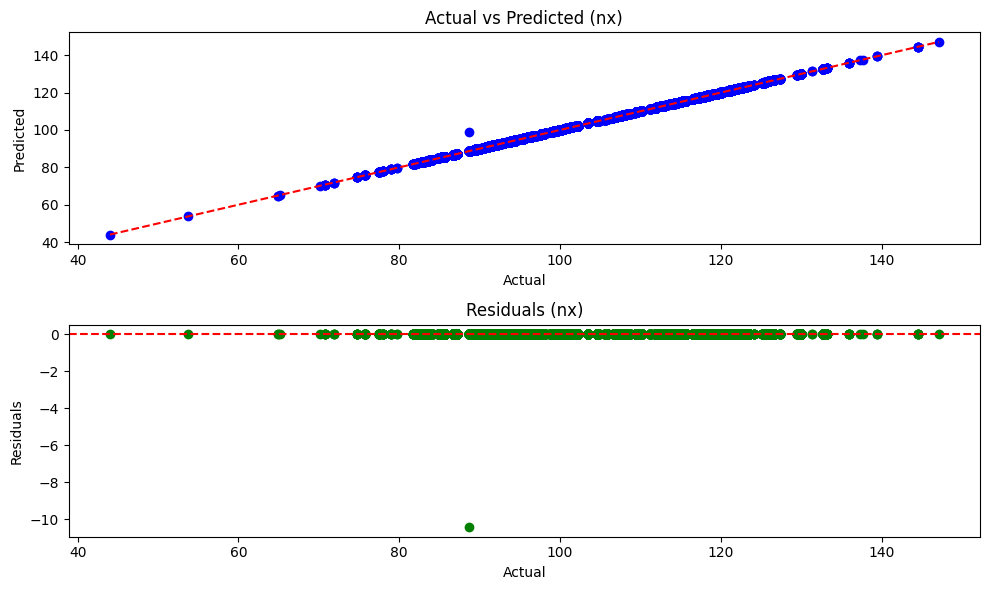

In [ ]:
import matplotlib.pyplot as plt

# nx 모델에 대한 예제
plt.figure(figsize=(10, 6))

# 실제값과 예측값 시각화
plt.subplot(2, 1, 1)
plt.scatter(tt_hitter_szone_nx, pred_hitter_szone_nx, color='blue')
plt.plot([min(tt_hitter_szone_nx), max(tt_hitter_szone_nx)], [min(tt_hitter_szone_nx), max(tt_hitter_szone_nx)], linestyle='--', color='red')
plt.title('Actual vs Predicted (nx)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# 잔차(Residual) 시각화
plt.subplot(2, 1, 2)
residuals_nx = tt_hitter_szone_nx - pred_hitter_szone_nx
plt.scatter(tt_hitter_szone_nx, residuals_nx, color='green')
plt.axhline(y=0, linestyle='--', color='red')
plt.title('Residuals (nx)')
plt.xlabel('Actual')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


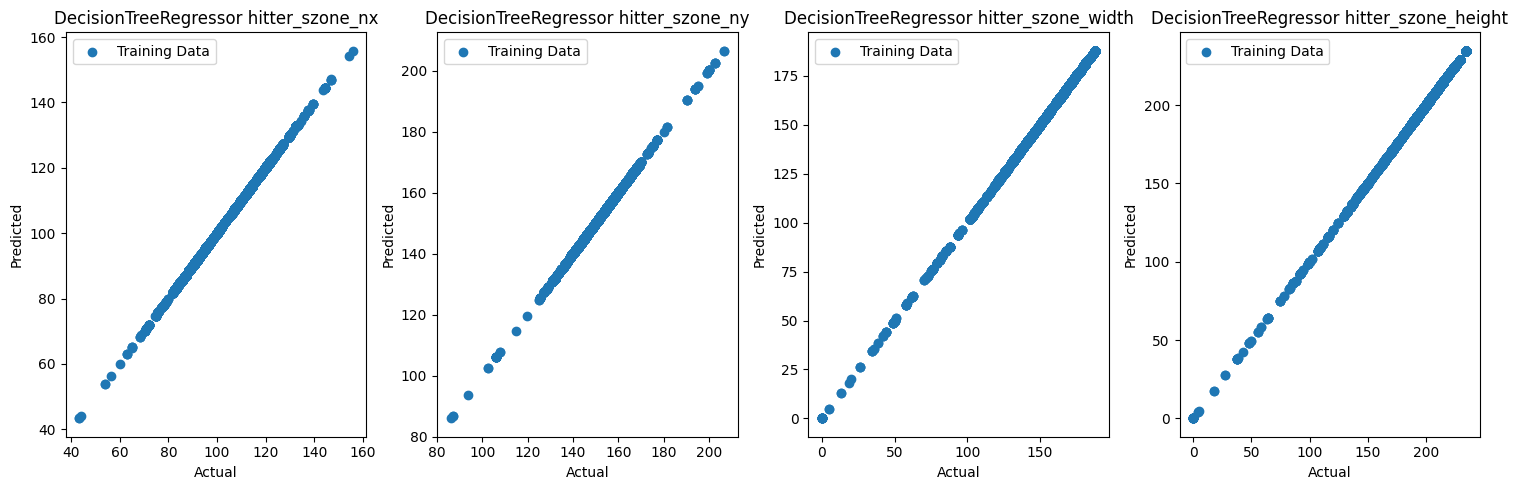

In [ ]:
import matplotlib.pyplot as plt

# Decision Tree 모델 훈련
from sklearn.tree import DecisionTreeRegressor

m_hitter_szone_nx = DecisionTreeRegressor()
m_hitter_szone_ny = DecisionTreeRegressor()
m_hitter_szone_width = DecisionTreeRegressor()
m_hitter_szone_height = DecisionTreeRegressor()

m_hitter_szone_nx.fit(tr_hitter_szone_nx_X, tr_hitter_szone_nx)
m_hitter_szone_ny.fit(tr_hitter_szone_ny_X, tr_hitter_szone_ny)
m_hitter_szone_width.fit(tr_hitter_szone_width_X, tr_hitter_szone_width)
m_hitter_szone_height.fit(tr_hitter_szone_height_X, tr_hitter_szone_height)

# 훈련 데이터의 산점도
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.scatter(tr_hitter_szone_nx, m_hitter_szone_nx.predict(tr_hitter_szone_nx_X), label='Training Data')
plt.title('DecisionTreeRegressor hitter_szone_nx')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

plt.subplot(1, 4, 2)
plt.scatter(tr_hitter_szone_ny, m_hitter_szone_ny.predict(tr_hitter_szone_ny_X), label='Training Data')
plt.title('DecisionTreeRegressor hitter_szone_ny')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

plt.subplot(1, 4, 3)
plt.scatter(tr_hitter_szone_width, m_hitter_szone_width.predict(tr_hitter_szone_width_X), label='Training Data')
plt.title('DecisionTreeRegressor hitter_szone_width')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

plt.subplot(1, 4, 4)
plt.scatter(tr_hitter_szone_height, m_hitter_szone_height.predict(tr_hitter_szone_height_X), label='Training Data')
plt.title('DecisionTreeRegressor hitter_szone_height')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.svm import SVR

m_hitter_szone_nx = SVR()
m_hitter_szone_ny = SVR()
m_hitter_szone_width = SVR()
m_hitter_szone_height = SVR()

m_hitter_szone_nx.fit(tr_hitter_szone_nx_X, tr_hitter_szone_nx)
m_hitter_szone_ny.fit(tr_hitter_szone_ny_X, tr_hitter_szone_ny)
m_hitter_szone_width.fit(tr_hitter_szone_width_X, tr_hitter_szone_width)
m_hitter_szone_height.fit(tr_hitter_szone_height_X, tr_hitter_szone_height)

print(m_hitter_szone_nx.score(tr_hitter_szone_nx_X, tr_hitter_szone_nx), m_hitter_szone_nx.score(tt_hitter_szone_nx_X, tt_hitter_szone_nx))
print(m_hitter_szone_ny.score(tr_hitter_szone_ny_X, tr_hitter_szone_ny), m_hitter_szone_ny.score(tt_hitter_szone_ny_X, tt_hitter_szone_ny))
print(m_hitter_szone_width.score(tr_hitter_szone_width_X, tr_hitter_szone_width), m_hitter_szone_width.score(tt_hitter_szone_width_X, tt_hitter_szone_width))
print(m_hitter_szone_height.score(tr_hitter_szone_height_X, tr_hitter_szone_height), m_hitter_szone_height.score(tt_hitter_szone_height_X, tt_hitter_szone_height))

## 심판 스트라이크존 기본값 구성
- 학습 대상 피쳐: "refree"
#### m_refree_szone_default_nx 학습용 데이터
    - 라벨데이터(y): refree_szone_default_nx / x_spot 중앙값
#### m_refree_szone_default_ny  학습용 데이터
    - 라벨데이터(y): refree_szone_default_ny / y_spot 중앙값
#### m_refree_szone_default_width 학습용 데이터
    - 라벨데이터(y): refree_szone_default_width / y_spot.max() - y_spot.min()
#### m_refree_szone_default_height 학습용 데이터
    - 라벨데이터(y): refree_szone_default_height / y_spot.max() - y_spot.min()

### 전처리

#### 학습용 데이터 전처리

In [10]:
X = df_main[["refree"]]

refree_szone_default_nx = df_main["refree_szone_default_nx"]
refree_szone_default_ny = df_main["refree_szone_default_ny"]
refree_szone_default_width = df_main["refree_szone_default_width"]
refree_szone_default_height = df_main["refree_szone_default_height"]

In [11]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

X_cate = X[[i for i in X.columns if X[i].dtype == "object"]]

ohe_refree_default_szone = OneHotEncoder()

data = ohe_refree_default_szone.fit_transform(X_cate).toarray()
col = ohe_refree_default_szone.get_feature_names_out()
s_X = pd.DataFrame(data, columns=col)

In [12]:
from sklearn.model_selection import train_test_split

tr_refree_szone_default_nx_X, tt_refree_szone_default_nx_X, tr_refree_szone_default_nx, tt_refree_szone_default_nx = train_test_split(s_X, refree_szone_default_nx)
tr_refree_szone_default_ny_X, tt_refree_szone_default_ny_X, tr_refree_szone_default_ny, tt_refree_szone_default_ny = train_test_split(s_X, refree_szone_default_ny)
tr_refree_szone_default_width_X, tt_refree_szone_default_width_X, tr_refree_szone_default_width, tt_refree_szone_default_width = train_test_split(s_X, refree_szone_default_width)
tr_refree_szone_default_height_X, tt_refree_szone_default_height_X, tr_refree_szone_default_height, tt_refree_szone_default_height = train_test_split(s_X, refree_szone_default_height)

#### 입력용 데이터 전처리기

In [13]:
def refree_szone_default_preprocessing(X):
    X = X[["refree"]]
    X_cate = X[[i for i in X.columns if X[i].dtype == "object"]]

    data = ohe_refree_default_szone.transform(X_cate).toarray()
    col = ohe_refree_default_szone.get_feature_names_out()
    s_X = pd.DataFrame(data, columns=col)

    return s_X

### 학습 및 예측

In [14]:
from sklearn.linear_model import Ridge

m_refree_szone_default_nx = Ridge()
m_refree_szone_default_ny = Ridge()
m_refree_szone_default_width = Ridge()
m_refree_szone_default_height = Ridge()

m_refree_szone_default_nx.fit(tr_refree_szone_default_nx_X, tr_refree_szone_default_nx)
m_refree_szone_default_ny.fit(tr_refree_szone_default_ny_X, tr_refree_szone_default_ny)
m_refree_szone_default_width.fit(tr_refree_szone_default_width_X, tr_refree_szone_default_width)
m_refree_szone_default_height.fit(tr_refree_szone_default_height_X, tr_refree_szone_default_height)

print(m_refree_szone_default_nx.score(tr_refree_szone_default_nx_X, tr_refree_szone_default_nx), m_refree_szone_default_nx.score(tt_refree_szone_default_nx_X, tt_refree_szone_default_nx))
print(m_refree_szone_default_ny.score(tr_refree_szone_default_ny_X, tr_refree_szone_default_ny), m_refree_szone_default_ny.score(tt_refree_szone_default_ny_X, tt_refree_szone_default_ny))
print(m_refree_szone_default_width.score(tr_refree_szone_default_width_X, tr_refree_szone_default_width), m_refree_szone_default_width.score(tt_refree_szone_default_width_X, tt_refree_szone_default_width))
print(m_refree_szone_default_height.score(tr_refree_szone_default_height_X, tr_refree_szone_default_height), m_refree_szone_default_height.score(tt_refree_szone_default_height_X, tt_refree_szone_default_height))

0.9999993805330316 0.9999993679946002
0.9999998336405318 0.9999998373550175
0.9999999614933252 0.9999999633316541
0.9999998599745923 0.9999998529721088


### 심판 스트라이크존 오차값 산출을 위한 선수별 스트라이크존 구성
- 학습 대상 피쳐: "refree", "hitter_name"
#### m_refree_szone_hitter_nx 학습용 데이터
    - 라벨데이터(y): refree_szone_hitter_nx / x_spot 중앙값
#### m_refree_szone_hitter_ny 학습용 데이터
    - 라벨데이터(y): refree_szone_hitter_ny / y_spot 중앙값
#### m_refree_szone_hitter_width 학습용 데이터
    - 라벨데이터(y): refree_szone_hitter_width / x_spot.max() - x_spot.min()
#### m_refree_szone_hitter_height 학습용 데이터
    - 라벨데이터(y): refree_szone_hitter_height / y_spot.max() - y_spot.min()

### 전처리

#### 학습용 데이터 전처리

In [15]:
X = df_main[["refree", "hitter_name"]]

refree_szone_hitter_nx = df_main["refree_szone_hitter_nx"]
refree_szone_hitter_ny = df_main["refree_szone_hitter_ny"]
refree_szone_hitter_width = df_main["refree_szone_hitter_width"]
refree_szone_hitter_height = df_main["refree_szone_hitter_height"]

In [16]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

X_cate = X[[i for i in X.columns if X[i].dtype == "object"]]

ohe_refree_hitter_szone = OneHotEncoder()

data = ohe_refree_hitter_szone.fit_transform(X_cate).toarray()
col = ohe_refree_hitter_szone.get_feature_names_out()
s_X = pd.DataFrame(data, columns=col)

In [ ]:
from sklearn.model_selection import train_test_split

tr_refree_szone_hitter_nx_X, tt_refree_szone_hitter_nx_X, tr_refree_szone_hitter_nx, tt_refree_szone_hitter_nx = train_test_split(s_X, refree_szone_hitter_nx)
tr_refree_szone_hitter_ny_X, tt_refree_szone_hitter_ny_X, tr_refree_szone_hitter_ny, tt_refree_szone_hitter_ny = train_test_split(s_X, refree_szone_hitter_ny)
tr_refree_szone_hitter_width_X, tt_refree_szone_hitter_width_X, tr_refree_szone_hitter_width, tt_refree_szone_hitter_width = train_test_split(s_X, refree_szone_hitter_width)
tr_refree_szone_hitter_height_X, tt_refree_szone_hitter_height_X, tr_refree_szone_hitter_height, tt_refree_szone_hitter_height = train_test_split(s_X, refree_szone_hitter_height)

#### 입력용 데이터 전처리기

In [ ]:
def refree_hitter_szone_preprocessing(X):
    X = X[["refree", "hitter_name"]]

    X_cate = X[[i for i in X.columns if X[i].dtype == "object"]]

    data = ohe_refree_hitter_szone.transform(X_cate).toarray()
    col = ohe_refree_hitter_szone.get_feature_names_out()
    s_X = pd.DataFrame(data, columns=col)

    return s_X

### 학습 및 예측

In [ ]:
from sklearn.tree import DecisionTreeRegressor

m_refree_szone_hitter_nx = DecisionTreeRegressor()
m_refree_szone_hitter_ny = DecisionTreeRegressor()
m_refree_szone_hitter_width = DecisionTreeRegressor()
m_refree_szone_hitter_height = DecisionTreeRegressor()

m_refree_szone_hitter_nx.fit(tr_refree_szone_hitter_nx_X, tr_refree_szone_hitter_nx)
m_refree_szone_hitter_ny.fit(tr_refree_szone_hitter_ny_X, tr_refree_szone_hitter_ny)
m_refree_szone_hitter_width.fit(tr_refree_szone_hitter_width_X, tr_refree_szone_hitter_width)
m_refree_szone_hitter_height.fit(tr_refree_szone_hitter_height_X, tr_refree_szone_hitter_height)

print(m_refree_szone_hitter_nx.score(tr_refree_szone_hitter_nx_X, tr_refree_szone_hitter_nx), m_refree_szone_hitter_nx.score(tt_refree_szone_hitter_nx_X, tt_refree_szone_hitter_nx))
print(m_refree_szone_hitter_ny.score(tr_refree_szone_hitter_ny_X, tr_refree_szone_hitter_ny), m_refree_szone_hitter_ny.score(tt_refree_szone_hitter_ny_X, tt_refree_szone_hitter_ny))
print(m_refree_szone_hitter_width.score(tr_refree_szone_hitter_width_X, tr_refree_szone_hitter_width), m_refree_szone_hitter_width.score(tt_refree_szone_hitter_width_X, tt_refree_szone_hitter_width))
print(m_refree_szone_hitter_height.score(tr_refree_szone_hitter_height_X, tr_refree_szone_hitter_height), m_refree_szone_hitter_height.score(tt_refree_szone_hitter_height_X, tt_refree_szone_hitter_height))

## 심판 스트라이크존 오차값 산출을 위한 이닝별 스트라이크존 구성
- 학습 대상 피쳐: "refree", "inning"
#### m_refree_szone_inning_nx 학습용 데이터
    - 라벨데이터(y): refree_szone_inning_nx / x_spot 중앙값
#### m_refree_szone_inning_ny  학습용 데이터
    - 라벨데이터(y): refree_szone_inning_ny / y_spot 중앙값
#### m_refree_szone_inning_width 학습용 데이터
    - 라벨데이터(y): refree_szone_inning_width / y_spot.max() - y_spot.min()
#### m_refree_szone_inning_height 학습용 데이터
    - 라벨데이터(y): refree_szone_inning_height / y_spot.max() - y_spot.min()

### 전처리

#### 학습용 데이터 전처리

In [ ]:
X = df_main[["refree", "inning"]]

refree_szone_inning_nx = df_main["refree_szone_inning_nx"]
refree_szone_inning_ny = df_main["refree_szone_inning_ny"]
refree_szone_inning_width = df_main["refree_szone_inning_width"]
refree_szone_inning_height = df_main["refree_szone_inning_height"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

X_cate = X[[i for i in X.columns if X[i].dtype == "object"]]
X_conti = X[[i for i in X.columns if X[i].dtype != "object"]]

ohe_refree_inning_szone = OneHotEncoder()
ms_refree_inning_szone = MinMaxScaler()

data = ohe_refree_inning_szone.fit_transform(X_cate).toarray()
col = ohe_refree_inning_szone.get_feature_names_out()
s_X_cate = pd.DataFrame(data, columns=col)

data = ms_refree_inning_szone.fit_transform(X_conti)
col = ms_refree_inning_szone.get_feature_names_out()
s_X_conti = pd.DataFrame(data, columns=col)

s_X = pd.concat([s_X_cate, s_X_conti], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

tr_refree_szone_inning_nx_X, tt_refree_szone_inning_nx_X, tr_refree_szone_inning_nx, tt_refree_szone_inning_nx = train_test_split(s_X, refree_szone_inning_nx)
tr_refree_szone_inning_ny_X, tt_refree_szone_inning_ny_X, tr_refree_szone_inning_ny, tt_refree_szone_inning_ny = train_test_split(s_X, refree_szone_inning_ny)
tr_refree_szone_inning_width_X, tt_refree_szone_inning_width_X, tr_refree_szone_inning_width, tt_refree_szone_inning_width = train_test_split(s_X, refree_szone_inning_width)
tr_refree_szone_inning_height_X, tt_refree_szone_inning_height_X, tr_refree_szone_inning_height, tt_refree_szone_inning_height = train_test_split(s_X, refree_szone_inning_height)

#### 입력용 데이터 전처리기

In [ ]:
def refree_inning_szone_preprocessing(X):
    X = X[["refree", "inning"]]
    X_cate = X[[i for i in X.columns if X[i].dtype == "object"]]
    X_conti = X[[i for i in X.columns if X[i].dtype != "object"]]

    data = ohe_refree_inning_szone.transform(X_cate).toarray()
    col = ohe_refree_inning_szone.get_feature_names_out()
    s_X_cate = pd.DataFrame(data, columns=col)

    data = ms_refree_inning_szone.transform(X_conti)
    col = ms_refree_inning_szone.get_feature_names_out()
    s_X_conti = pd.DataFrame(data, columns=col)

    s_X = pd.concat([s_X_cate, s_X_conti], axis=1)

    return s_X

### 학습 및 예측

In [ ]:
from sklearn.tree import DecisionTreeRegressor

m_refree_szone_inning_nx = DecisionTreeRegressor()
m_refree_szone_inning_ny = DecisionTreeRegressor()
m_refree_szone_inning_width = DecisionTreeRegressor()
m_refree_szone_inning_height = DecisionTreeRegressor()

m_refree_szone_inning_nx.fit(tr_refree_szone_inning_nx_X, tr_refree_szone_inning_nx)
m_refree_szone_inning_ny.fit(tr_refree_szone_inning_ny_X, tr_refree_szone_inning_ny)
m_refree_szone_inning_width.fit(tr_refree_szone_inning_width_X, tr_refree_szone_inning_width)
m_refree_szone_inning_height.fit(tr_refree_szone_inning_height_X, tr_refree_szone_inning_height)

print(m_refree_szone_inning_nx.score(tr_refree_szone_inning_nx_X, tr_refree_szone_inning_nx), m_refree_szone_inning_nx.score(tt_refree_szone_inning_nx_X, tt_refree_szone_inning_nx))
print(m_refree_szone_inning_ny.score(tr_refree_szone_inning_ny_X, tr_refree_szone_inning_ny), m_refree_szone_inning_ny.score(tt_refree_szone_inning_ny_X, tt_refree_szone_inning_ny))
print(m_refree_szone_inning_width.score(tr_refree_szone_inning_width_X, tr_refree_szone_inning_width), m_refree_szone_inning_width.score(tt_refree_szone_inning_width_X, tt_refree_szone_inning_width))
print(m_refree_szone_inning_height.score(tr_refree_szone_inning_height_X, tr_refree_szone_inning_height), m_refree_szone_inning_height.score(tt_refree_szone_inning_height_X, tt_refree_szone_inning_height))

1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0


## 심판 스트라이크존 오차값 산출을 위한 구종별 스트라이크존 구성
- 학습 대상 피쳐: "refree", "ball_type"
#### m_refree_szone_btype_nx 학습용 데이터
    - 라벨데이터(y): refree_szone_btype_nx / x_spot 중앙값
#### m_refree_szone_btype_ny  학습용 데이터
    - 라벨데이터(y): refree_szone_btype_ny / y_spot 중앙값
#### m_refree_szone_btype_width 학습용 데이터
    - 라벨데이터(y): refree_szone_btype_width / y_spot.max() - y_spot.min()
#### m_refree_szone_btype_height 학습용 데이터
    - 라벨데이터(y): refree_szone_btype_height / y_spot.max() - y_spot.min()

### 전처리

#### 학습용 데이터 전처리

In [ ]:
X = df_main[["refree", "ball_type"]]

refree_szone_btype_nx = df_main["refree_szone_btype_nx"]
refree_szone_btype_ny = df_main["refree_szone_btype_ny"]
refree_szone_btype_width = df_main["refree_szone_btype_width"]
refree_szone_btype_height = df_main["refree_szone_btype_height"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

X_cate = X[[i for i in X.columns if X[i].dtype == "object"]]

ohe_refree_btype_szone = OneHotEncoder()

data = ohe_refree_btype_szone.fit_transform(X_cate).toarray()
col = ohe_refree_btype_szone.get_feature_names_out()
s_X = pd.DataFrame(data, columns=col)

In [ ]:
from sklearn.model_selection import train_test_split

tr_refree_szone_btype_nx_X, tt_refree_szone_btype_nx_X, tr_refree_szone_btype_nx, tt_refree_szone_btype_nx = train_test_split(s_X, refree_szone_btype_nx)
tr_refree_szone_btype_ny_X, tt_refree_szone_btype_ny_X, tr_refree_szone_btype_ny, tt_refree_szone_btype_ny = train_test_split(s_X, refree_szone_btype_ny)
tr_refree_szone_btype_width_X, tt_refree_szone_btype_width_X, tr_refree_szone_btype_width, tt_refree_szone_btype_width = train_test_split(s_X, refree_szone_btype_width)
tr_refree_szone_btype_height_X, tt_refree_szone_btype_height_X, tr_refree_szone_btype_height, tt_refree_szone_btype_height = train_test_split(s_X, refree_szone_btype_height)

#### 입력용 데이터 전처리기

In [ ]:
def refree_btype_szone_preprocessing(X):
    X = X[["refree", "ball_type"]]
    X_cate = X[[i for i in X.columns if X[i].dtype == "object"]]

    data = ohe_refree_btype_szone.transform(X_cate).toarray()
    col = ohe_refree_btype_szone.get_feature_names_out()
    s_X = pd.DataFrame(data, columns=col)

    return s_X

### 학습 및 예측

In [ ]:
from sklearn.tree import DecisionTreeRegressor

m_refree_szone_btype_nx = DecisionTreeRegressor()
m_refree_szone_btype_ny = DecisionTreeRegressor()
m_refree_szone_btype_width = DecisionTreeRegressor()
m_refree_szone_btype_height = DecisionTreeRegressor()

m_refree_szone_btype_nx.fit(tr_refree_szone_btype_nx_X, tr_refree_szone_btype_nx)
m_refree_szone_btype_ny.fit(tr_refree_szone_btype_ny_X, tr_refree_szone_btype_ny)
m_refree_szone_btype_width.fit(tr_refree_szone_btype_width_X, tr_refree_szone_btype_width)
m_refree_szone_btype_height.fit(tr_refree_szone_btype_height_X, tr_refree_szone_btype_height)

print(m_refree_szone_btype_nx.score(tr_refree_szone_btype_nx_X, tr_refree_szone_btype_nx), m_refree_szone_btype_nx.score(tt_refree_szone_btype_nx_X, tt_refree_szone_btype_nx))
print(m_refree_szone_btype_ny.score(tr_refree_szone_btype_ny_X, tr_refree_szone_btype_ny), m_refree_szone_btype_ny.score(tt_refree_szone_btype_ny_X, tt_refree_szone_btype_ny))
print(m_refree_szone_btype_width.score(tr_refree_szone_btype_width_X, tr_refree_szone_btype_width), m_refree_szone_btype_width.score(tt_refree_szone_btype_width_X, tt_refree_szone_btype_width))
print(m_refree_szone_btype_height.score(tr_refree_szone_btype_height_X, tr_refree_szone_btype_height), m_refree_szone_btype_height.score(tt_refree_szone_btype_height_X, tt_refree_szone_btype_height))

1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0


## 스트라이크존 시각화

In [6]:
df_info = pd.read_csv('/content/drive/MyDrive/핵심프로젝트/KBO 전략데이터(2020제외).csv')

In [ ]:
df_info = pd.read_csv("/content/drive/MyDrive/핵심프로젝트/KBO 전략데이터(2020제외).csv")

In [7]:
# 전략데이터에서 특정 타자의 볼/스트라이크 데이터를 가져오는 함수
def get_hitter_p_data(name):
    df = df_info[df_info.hitter_name==name]
    idx = random.randrange(1, len(df)-1)
    df = df
    strike_x = df[(df.judgement=="스트라이크")].x_spot
    strike_y = df[(df.judgement=="스트라이크")].y_spot
    ball_x = df[(df.judgement=="볼")].x_spot
    ball_y = df[(df.judgement=="볼")].y_spot

    return strike_x, strike_y, ball_x, ball_y

In [13]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
import matplotlib.patches as patches
import math

from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

def pil_draw_rect_with_label(image, point1, point2, text, font_color=(255, 255, 255)):
    draw = ImageDraw.Draw(image)
    draw.rectangle((point1, point2), outline=(0, 0, 255), width=3)

    x1, y1 = point1
    imageFont = ImageFont.load_default()
    text_width, text_height = imageFont.getsize(text)
    draw.rectangle(((x1, y1 - text_height), (x1 + text_width, y1)), fill=(0, 0, 255)) #채워진 사각형
    draw.text((x1, y1 - text_height), text, font=imageFont, fill=font_color)

    return image

def 타자존_좌표예측(X):
    s_X = hitter_szone_preprocessing(X)

    s_X_nx = m_hitter_szone_nx.predict(s_X)
    s_X_ny= m_hitter_szone_ny.predict(s_X)
    s_X_width = m_hitter_szone_width.predict(s_X)
    s_X_height = m_hitter_szone_height.predict(s_X)

    return s_X_nx, s_X_ny, s_X_width, s_X_height


def 심판존_좌표예측(X):
    s_X_default = refree_szone_default_preprocessing(X)
    s_X_default_x, s_X_default_y, s_X_default_w, s_X_default_h = m_refree_szone_default_nx.predict(s_X_default), m_refree_szone_default_ny.predict(s_X_default), m_refree_szone_default_width.predict(s_X_default), m_refree_szone_default_height.predict(s_X_default)

    # 심판존 오차계산
    s_X_hitter = refree_hitter_szone_preprocessing(X)
    s_X_inning = refree_inning_szone_preprocessing(X)
    s_X_btype = refree_btype_szone_preprocessing(X)

    s_X_hitter_x, s_X_hitter_y, s_X_hitter_w, s_X_hitter_h = m_refree_szone_hitter_nx.predict(s_X_hitter), m_refree_szone_hitter_ny.predict(s_X_hitter), m_refree_szone_hitter_width.predict(s_X_hitter), m_refree_szone_hitter_height.predict(s_X_hitter)
    s_X_inning_x, s_X_inning_y, s_X_inning_w, s_X_inning_h = m_refree_szone_inning_nx.predict(s_X_inning), m_refree_szone_inning_ny.predict(s_X_inning), m_refree_szone_inning_width.predict(s_X_inning), m_refree_szone_inning_height.predict(s_X_inning)
    s_X_btype_x, s_X_btype_y, s_X_btype_w, s_X_btype_h = m_refree_szone_btype_nx.predict(s_X_btype), m_refree_szone_btype_ny.predict(s_X_btype), m_refree_szone_btype_width.predict(s_X_btype), m_refree_szone_btype_height.predict(s_X_btype)


    # 선수 및 이닝에 따른 오차범위 산출 - 표준편차 활용
    이닝오차_x = np.std([s_X_default_x, s_X_hitter_x, s_X_inning_x])
    이닝오차_y = np.std([s_X_default_y, s_X_hitter_y, s_X_inning_y])
    이닝오차_w = np.std([s_X_default_w, s_X_hitter_w, s_X_inning_w])
    이닝오차_h = np.std([s_X_default_h, s_X_hitter_h, s_X_inning_h])

    # 구종오차 산출 - 표준편차 활용
    구종오차_x = np.std([s_X_default_x, s_X_hitter_x, s_X_inning_x, s_X_btype_x])
    구종오차_y = np.std([s_X_default_y, s_X_hitter_y, s_X_inning_y, s_X_btype_y])
    구종오차_w = np.std([s_X_default_w, s_X_hitter_w, s_X_inning_w, s_X_btype_w])
    구종오차_h = np.std([s_X_default_h, s_X_hitter_h, s_X_inning_h, s_X_btype_h])

    # 심판존에 이닝오차 반영
    심판존_x = s_X_default_x + 이닝오차_x if s_X_default_x < sum([s_X_default_x, s_X_hitter_x, s_X_inning_x])/3 else s_X_default_x - 이닝오차_x # 이닝오차 표본집단 평균이 더 크면 오른쪽으로
    심판존_y = s_X_default_y + 이닝오차_y if s_X_default_y < sum([s_X_default_y, s_X_hitter_y, s_X_inning_y])/3 else s_X_default_y - 이닝오차_y # 이닝오차 표본집단 평균이 더 크면 아래로
    심판존_w = s_X_default_w + 이닝오차_w if s_X_default_w < sum([s_X_default_w, s_X_hitter_w, s_X_inning_w])/3 else s_X_default_w - 이닝오차_w # 이닝오차 표본집단 평균이 더 크면 넓어지도록
    심판존_h = s_X_default_h + 이닝오차_x if s_X_default_h < sum([s_X_default_h, s_X_hitter_h, s_X_inning_h])/3 else s_X_default_h - 이닝오차_h # 이닝오차 표본집단 평균이 더 크면 길어지도록

    # 심판존에 구종오차 반영
    구종반영_x = s_X_default_x + 구종오차_x if s_X_default_x < sum([s_X_default_x, s_X_hitter_x, s_X_inning_x, s_X_btype_x])/4 else s_X_default_x - 구종오차_x # 구종오차 표본집단 평균이 더 크면 오른쪽으로
    구종반영_y = s_X_default_y + 구종오차_y if s_X_default_y < sum([s_X_default_y, s_X_hitter_y, s_X_inning_y, s_X_btype_y])/4 else s_X_default_y - 구종오차_y # 구종오차 표본집단 평균이 더 크면 아래로
    구종반영_w = s_X_default_w + 구종오차_w if s_X_default_w < sum([s_X_default_w, s_X_hitter_w, s_X_inning_w, s_X_btype_w])/4 else s_X_default_w - 구종오차_w # 구종오차 표본집단 평균이 더 크면 넓어지도록
    구종반영_h = s_X_default_h + 구종오차_h if s_X_default_h < sum([s_X_default_h, s_X_hitter_h, s_X_inning_h, s_X_btype_h])/4 else s_X_default_h - 구종오차_h # 구종오차 표본집단 평균이 더 크면 길어지도록

    return 심판존_x, 심판존_y, 심판존_w, 심판존_h, 구종반영_x, 구종반영_y, 구종반영_w, 구종반영_h

# 추천투구 - 좌상단 거리계산 / 너클제외
def 좌상단_추천투구(X):
    최대오차 = 0
    핵심구종 = None
    핵심_x = None
    핵심_y = None

    for type in [i for i in df_main.ball_type.unique() if i not in ["너클", "싱커"]]:
        X.ball_type = type

        타자_x, 타자_y, 타자_w, 타자_h = 타자존_좌표예측(X)
        심_x, 심_y, 심_w, 심_h, 구종_x, 구종_y, 구종_w, 구종_h = 심판존_좌표예측(X)

        타자_x -= 타자_w / 2
        타자_y -= 타자_h / 2
        구종_x -= 구종_w / 2
        구종_y -= 구종_h / 2

        거리 = math.sqrt((구종_x-타자_x)**2 + (구종_y-타자_y)**2)

        if 최대오차 < 거리:
            최대오차 = 거리
            핵심구종 = type
            핵심_x = 구종_x
            핵심_y = 구종_y

    return 핵심구종, 핵심_x, 핵심_y

# 추천투구 - 우상단 거리계산 / 너클제외
def 우상단_추천투구(X):
    최대오차 = 0
    핵심구종 = None
    핵심_x = None
    핵심_y = None

    for type in [i for i in df_main.ball_type.unique() if i not in ["너클", "싱커"]]:
        X.ball_type = type

        타자_x, 타자_y, 타자_w, 타자_h = 타자존_좌표예측(X)
        심_x, 심_y, 심_w, 심_h, 구종_x, 구종_y, 구종_w, 구종_h = 심판존_좌표예측(X)

        타자_x += 타자_w / 2
        타자_y -= 타자_h / 2
        구종_x += 구종_w / 2
        구종_y -= 구종_h / 2

        거리 = math.sqrt((구종_x-타자_x)**2 + (구종_y-타자_y)**2)

        if 최대오차 < 거리:
            최대오차 = 거리
            핵심구종 = type
            핵심_x = 구종_x
            핵심_y = 구종_y

    return 핵심구종, 핵심_x, 핵심_y

# 추천투구 - 좌하단 거리계산 / 너클제외
def 좌하단_추천투구(X):
    최대오차 = 0
    핵심구종 = None
    핵심_x = None
    핵심_y = None

    for type in [i for i in df_main.ball_type.unique() if i not in ["너클", "싱커"]]:
        X.ball_type = type

        타자_x, 타자_y, 타자_w, 타자_h = 타자존_좌표예측(X)
        심_x, 심_y, 심_w, 심_h, 구종_x, 구종_y, 구종_w, 구종_h = 심판존_좌표예측(X)

        타자_x -= 타자_w / 2
        타자_y += 타자_h / 2
        구종_x -= 구종_w / 2
        구종_y += 구종_h / 2

        거리 = math.sqrt((구종_x-타자_x)**2 + (구종_y-타자_y)**2)

        if 최대오차 < 거리:
            최대오차 = 거리
            핵심구종 = type
            핵심_x = 구종_x
            핵심_y = 구종_y

    return 핵심구종, 핵심_x, 핵심_y

# 추천투구 - 좌상단 거리계산 / 너클제외
def 우하단_추천투구(X):
    최대오차 = 0
    핵심구종 = None
    핵심_x = None
    핵심_y = None

    for type in [i for i in df_main.ball_type.unique() if i not in ["너클", "싱커"]]:
        X.ball_type = type

        타자_x, 타자_y, 타자_w, 타자_h = 타자존_좌표예측(X)
        심_x, 심_y, 심_w, 심_h, 구종_x, 구종_y, 구종_w, 구종_h = 심판존_좌표예측(X)

        타자_x += 타자_w / 2
        타자_y += 타자_h / 2
        구종_x += 구종_w / 2
        구종_y += 구종_h / 2

        거리 = math.sqrt((구종_x-타자_x)**2 + (구종_y-타자_y)**2)

        if 최대오차 < 거리:
            최대오차 = 거리
            핵심구종 = type
            핵심_x = 구종_x
            핵심_y = 구종_y

    return 핵심구종, 핵심_x, 핵심_y

def get_pitch_data(hname):
    X = df_main[df_main.hitter_name == hname]
    X_idx = random.randrange(1, len(X)-1)
    X = X[X_idx-1 : X_idx]

    return X

def get_hitter_sb(hname):
    X = df_main[df_main.hitter_name == hname]

    strike_x, strike_y = X[X.judgement=="스트라이크"].x_spot, X[X.judgement=="스트라이크"].y_spot
    ball_x, ball_y = X[X.judgement=="볼"].x_spot, X[X.judgement=="볼"].y_spot

    return strike_x, strike_y, ball_x, ball_y

def 출력(X, 이닝, 구종):
    if 이닝 == "-1":
        return

    X.inning = int(이닝)
    X.ball_type = 구종
    타자존_x, 타자존_y, 타자존_w, 타자존_h = 타자존_좌표예측(X)
    심판존_x, 심판존_y, 심판존_w, 심판존_h, 구종_x, 구종_y, 구종_w, 구종_h = 심판존_좌표예측(X)

    tl_추천구종, tl_추천_x, tl_추천_y = 좌상단_추천투구(X)
    tr_추천구종, tr_추천_x, tr_추천_y = 우상단_추천투구(X)
    bl_추천구종, bl_추천_x, bl_추천_y = 좌하단_추천투구(X)
    br_추천구종, br_추천_x, br_추천_y = 우하단_추천투구(X)

    #print(구종_x, 구종_y, 구종_w, 구종_h)

    fig, ax = plt.subplots()
    x = 235*3 / fig.dpi
    y = 304*3 / fig.dpi
    fig.set_figwidth(x)
    fig.set_figheight(y)

    # y축 반전 - 0이 위로 오도록
    ax.invert_yaxis()

    # background
    plt.gca().add_patch(
        patches.Rectangle(
            (0, 0),                   # (x, y)
            235, 304,                     # width, height
            facecolor = 'black', lw=3,
            fill= True
        ))

    # 전체 스트라이크 및 볼
    strike_x, strike_y, ball_x, ball_y = get_hitter_sb(X.hitter_name.values[0])

    #plt.scatter(ball_x, ball_y, s=24*3*2, c="green")
    plt.scatter(strike_x, strike_y, s=24*3*2, c="orange")

    # 타자존
    rect_x = 타자존_x - 타자존_w/2
    rect_y = 타자존_y - 타자존_h/2

    # 심판존
    rect_x2 = 심판존_x - 심판존_w/2
    rect_y2 = 심판존_y - 심판존_h/2

    # 구종별 예상 스트라이크존
    rect_x3 = 구종_x - 구종_w/2
    rect_y3 = 구종_y - 구종_h/2


    plt.gca().add_patch(
        patches.Rectangle(
            (rect_x, rect_y),                   # (x, y)
            타자존_w, 타자존_h,                     # width, height
            edgecolor = 'white', lw=3,
            fill= None
        ))

    plt.gca().add_patch(
        patches.Rectangle(
            (rect_x2, rect_y2),                   # (x, y)
            심판존_w, 심판존_h,                     # width, height
            edgecolor = 'yellow', lw=3,
            fill= None
        ))

    plt.gca().add_patch(
        patches.Rectangle(
            (rect_x3, rect_y3),                   # (x, y)
            구종_w, 구종_h,                     # width, height
            edgecolor = 'red', lw=3,
            fill= None
        ))

    plt.grid(True)
    plt.title(f"{X.hitter_name.values[0]} 예상 스트라이크존 - {이닝} 이닝 {구종} 투구 시")

    plt.scatter(타자존_x, 타자존_y, s=12*3*2, c="white", label=f"타자존")
    plt.scatter(심판존_x, 심판존_y, s=12*3*2, c="yellow", label=f"심판존")
    plt.scatter(구종_x, 구종_y, s=12*3*2, c="red", label=f"{구종} 시 예상 S존")

    plt.scatter(tl_추천_x, tl_추천_y, s=12*3*2, c="green", label=f"추천구종1-{tl_추천구종}")
    plt.scatter(tl_추천_x, tl_추천_y, s=1500*3*2, alpha=0.5, c="red")

    plt.scatter(tr_추천_x, tr_추천_y, s=12*3*2, c="purple", label=f"추천구종2-{tr_추천구종}")
    plt.scatter(tr_추천_x, tr_추천_y, s=1500*3*2, alpha=0.5, c="red")

    plt.scatter(bl_추천_x, bl_추천_y, s=12*3*2, c="blue", label=f"추천구종3-{bl_추천구종}")
    plt.scatter(bl_추천_x, bl_추천_y, s=1500*3*2, alpha=0.5, c="red")

    plt.scatter(br_추천_x, br_추천_y, s=12*3*2, c="black", label=f"추천구종4-{br_추천구종}")
    plt.scatter(br_추천_x, br_추천_y, s=1500*3*2, alpha=0.5, c="red")

    plt.legend()
    plt.show()

    #print("구종목록")
    #print([i for i in df_main.ball_type.unique() if i != "너클"])
    #i, b = input("입력(이닝 / 구종): ").replace(" ", "").split("/")
    #return 출력(X, i, b)

#print("구종목록")
#print([i for i in df_main.ball_type.unique() if i != "너클"])
#i, b = input("입력(이닝 / 구종): ").replace(" ", "").split("/")

X = get_pitch_data("손아섭")
for i in range(1, 10):
    for b in [i for i in df_main.ball_type.unique() if i != "너클"]:
        출력(X, i, b)

NameError: name 'm_hitter_szone_nx' is not defined